<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_BII_Lesson13/blob/main/%E7%B5%8C%E5%96%B6%E6%83%85%E5%A0%B1%E5%90%84%E8%AB%96B%E2%85%A1_%E7%AC%AC%EF%BC%91%EF%BC%93%E5%9B%9E_%E7%89%B9%E5%BE%B4%E8%AA%9E%E6%8A%BD%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経営情報各論BⅡ：13．特徴語抽出

本日の講義では，複数データを比較して，それを特徴付ける単語を抽出する方法を学びます．そのために，まずは，第１部で複数のデータの違いを検証する統計的な手法について学んで，それを利用して，第２部で，複数のデータそれぞれを特徴付ける語（特徴語）の抽出技術を学びます．


# 経営情報各論BⅡ：13【第１部】データの違いを検証
複数のデータ間に見られる頻度の差が統計的に有意味な差なのか否かを判断するための統計手法について学ぶ．  
具体的には，$\chi^2$検定という仮説検定の方法，オッズ比，$\phi$係数といった効果量の指標を説明する．

## 13.1.1 仮説検定
### 推測統計学
- 統計学は，大まかに記述統計学と推測統計学から構成されている．
- 記述統計学：手許のデータの特性を数値やグラフで記述
- 推測統計学：手許のデータから母集団の特性を推測．
- 推測統計学では，手許のデータは母集団の一部（標本）とみなし，母集団全体の特性を推測する
- 標本が母集団の特性を反映しているとは限らない．これを仮説検定という分析で推測する．
### 帰無仮説と対立仮説
- 仮説検定：複数の標本における数値の差が偶然によるものか，それとも母集団における差を反映するものかを推測する
- 仮説検定では，以下の２つの仮説のうち帰無仮説に基づいて，その仮説の確からしさ（検定統計量）を計算する．
    - 帰無仮説：比較しているデータ間に差がない
    - 対立仮説：比較しているデータ間に差がある
- 帰無仮説が正しい確率がどれくらいであれば帰無仮説を受け入れるかという基準（有意水準）をあらかじめ決めておく
- 一般的には，帰無仮説が正しい確率が5%よりも低い場合に帰無仮説を棄却し，差があるとみなします．
- 仮説検定は確率に基づく推測であるため，差の有無の判定が間違っていることもある
### $\chi^2$検定（カイ2乗検定）
- 仮説検定の手法にはさまざまのものがあるが，言語研究では$\chi^2$検定が良く使われます．
- $\chi^2$検定では，実際にデータ中に何回出てきたかという単純頻度のクロス表（以下に示す）を用意します．  

||as though|as if|
|-|-|-|
|Spoken|2068|4786|
|Academic|1286|5528|

- 帰無仮説を「話し言葉と学術散文では"as though"と"as if"の使用頻度に統計的に有意味な差がない」とし，対立仮説は「話し言葉と学術散文では"as though"と"as if"の使用頻度に統計的に有意味な差がある」とします．
- $\chi^2$検定では，実際にデータから得られた頻度（実測値）と「比較しているデータ間に差がない」と仮定した場合の論理的な頻度（期待値）の差の大きさを調べることで，比較しているデータ間に見られる差が偶然によるものかどうかを確率的に判断する
- 上記例では，期待値は，話し言葉と学術散文における"as though"と"as if"の使用頻度が全く同じ場合の数値となる．行合計，列合計，総合計（列合計あるいは行合計の合計）で計算できます．
$$
期待値=\frac{行合計×列合計}{総合計（行合計あるいは列合計の合計）}
$$

||as though|as if|行合計|
|-|-|-|-|
|Spoken|2068|4786|6854|
|Academic|1286|5528|6814|
|列合計|3354|10314|13668|
||||↑総合計|

期待値は，

||as thogh|as if|
|-|-|-|
|Spoken|1681.91|5172.09|
|Academic|1672.09|5141.91|

となる.

実測値と期待値をモザイクプロットで比較します．話し言葉では"as though"の頻度が期待値より高く，学術散文では"as if"の頻度が期待値より高いことがわかる．また，期待値が「比較しているデータ間に差がない」と仮定した場合の論理的な頻度であることも一目瞭然です．


In [1]:
# matplotlibを日本語表示に対応させるモジュール
# 以下の !pip install japanize-matplotlib  でインストールできます．初めての実行時に実行すること．
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c24d4202d7b92ad4b675228e018bffd9c88ff9ac1a42e49f0798f2422b1cc2a2
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


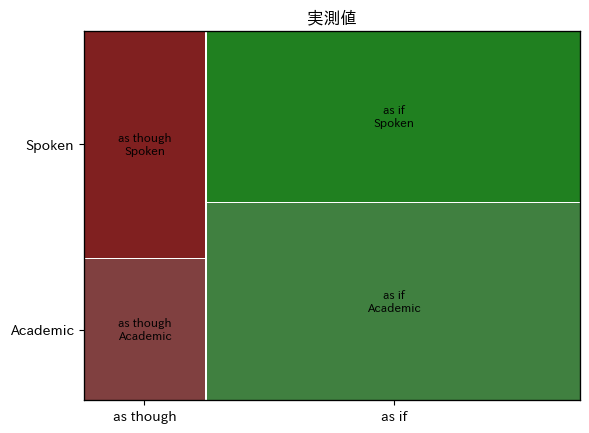

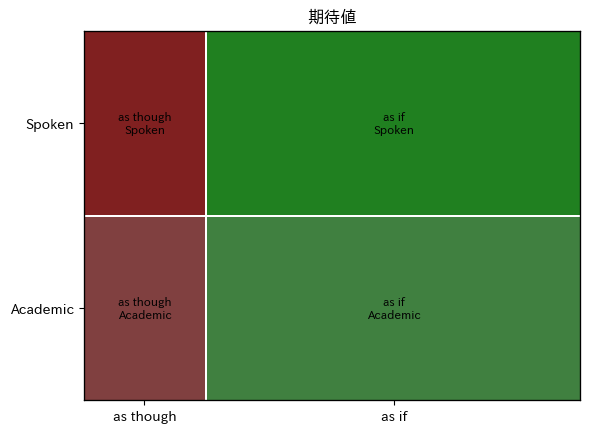

In [2]:
# モザイクプロットの作成
# 入力データはプログラム内に記述
# タイトルは日本語フォントを指定

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from statsmodels.graphics.mosaicplot import mosaic
# 実測値
data = {('as though', 'Academic'): 1286, ('as though', 'Spoken'): 2068, ('as if', 'Academic'): 5528, ('as if', 'Spoken',): 4786}
mosaic(data)
#plt.title("実測値", fontname="HGMaruGothicMPRO")
plt.title("実測値")
plt.show()
# 期待値
data = {('as though', 'Academic'): 1672.09, ('as though', 'Spoken'): 1681.91, ('as if', 'Academic'): 5141.91, ('as if', 'Spoken',): 5172.09}
mosaic(data)
#plt.title("期待値", fontname="HGMaruGothicMPRO")
plt.title("期待値")
plt.show()

- $\chi^2$検定では，実測値と期待値のずれの大きさを$\chi^2$値で表す．$\chi^2$値は以下のように求める．

$$
\chi^2値=\sum{\frac{(実測値-期待値)^2}{期待値}}
$$

- $\chi^2$値は以下の性質を持つ
    - 実測値と期待値が完全に一致すると，$\chi^2$値は0になる
    - 実測値と期待値のずれが大きいほど$\chi^2$値は大きな値になる
- 上記の例で$\chi^2$値を求めてみる

In [4]:
# χ２乗値を求める
# まず，データを読み込む
import pandas as pd
from scipy import stats
ad_df = pd.read_csv('coca.csv')
n = len(ad_df)
print(n)
ad_df.head()

13668


,SorA,tori
0,Spoken,as though
1,Spoken,as though
2,Spoken,as though
3,Spoken,as though
4,Spoken,as though


In [5]:
# 次に，クロス集計表を作成する
ad_cross = pd.crosstab(ad_df['SorA'], ad_df['tori'])
ad_cross

tori,as if,as though
SorA,,
Academic,5528,1286
Spoken,4786,2068


In [6]:
# scipy.statsのchi2.contingency関数を使って簡単に計算
# 引数にクロス集計表を渡し，correctionをFalseにする．
# 帰り値は，検定統計量（χ２乗値），p値，自由度，期待度となる
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction=False)
chi2, p, dof, ef

(235.59198985701096,
 3.5965405367270067e-53,
 1,
 array([[5141.90781387, 1672.09218613],
        [5172.09218613, 1681.90781387]]))

- これで$\chi^2$値が235.59であり，自由度が1とわかる．自由度1の$\chi^2$分布から，確率0.05(5%)のときの$\chi^2$値は，3.84で，求めた$\chi^2$値の235.59の方が大きいため，帰無仮説は棄却され，対立仮説が支持される．つまり「現代アメリカ英語において，話し言葉と学術散文の間に"as though"と"as if"の頻度に差がある」となる．

## 13.1.2 効果量
### 検定とサンプルサイズ
- 検定結果がサンプルサイズの影響を受けることに注意が必要
- 例えば，以下のサンプルデータを考えます．この$\chi^2$値を計算すると3.58となる．5%の値3.84より小さいので，単語Aと単語Bの頻度に関して，文書Xと文書Yの間に有意水準5%の有意差は見られない．

||単語A|単語B|
|-|-|-|
|文章X|96|54|
|文章Y|52|48|

- しかし，すべての値を以下のように10倍にし，$\chi^2$値を計算すると35.78となる．5%の値3.84より大きいので，単語Aと単語Bの頻度に関して，文書Xと文書Yの間に有意水準5%の有意差があるということになる．

||単語A|単語B|
|-|-|-|
|文章X|960|540|
|文章Y|520|480|

- 比率は同じなのですが，表中の値が大きくなるほど，有意差が出やすいのです．そのため，計量的な言語研究では，検定の結果だけでなく，効果量と呼ばれるサンプルサイズに影響を受けない指標を確認することが重要となる．

### オッズ比
- ある事象の起こりやすさを２つのデータで比較するために用いられる指標で，頻度差の検定で用いる効果量としては最も一般的．
- 上記の例では，「文書Xにおける単語Aの頻度と単語Bの頻度の割合（比率）」を「文章Yにおける単語Aと単語Bの頻度の割合（比率）」で割ったものがオッズ比

$$
オッズ比＝\frac{\frac{文書Xにおける単語Aの頻度}{文書Xにおける単語Bの頻度}}{\frac{文書Yにおける単語Aの頻度}{文書Yにおける単語Bの頻度}}=\frac{\frac{96}{54}}{\frac{52}{48}}\fallingdotseq 1.64
$$

- オッズ比の下限は0で，オッズ比が1を下回っている場合は，「文書Xで単語Aが使われている割合」よりも「文書Yで単語Aが使われている割合」の方が大きいことを意味する．オッズ比が1を上回っている場合は，「文書Xで単語Bが使われている割合」よりも「文書Yで単語Bが使われている割合」の方が大きいことを意味する．
- 効果量はサンプル数の影響を受けないので，数値を10倍にしたデータでオッズ比を計算しても，10倍する前と同じ．

$$
オッズ比＝\frac{\frac{960}{540}}{\frac{520}{480}}\fallingdotseq 1.64
$$

### $\phi$係数
- $\phi$係数は，$\chi^2$値をサンプルサイズ（クロス集計表におけるすべての値の総和）で割った値の平方根．n行×m列のクロス集計表における行要素と列要素の関連の強さを示す指標。$0\leq\phi\leq\sqrt{min(r,c)-1}$の値をとり、上限に近いほど関連は強い。ただし、集計表の行列のサイズにより上限が異なるので、行列が等しい集計表の間でしか比較する意味が無い。

$$
\phi係数=\sqrt{\frac{\chi^2値}{サンプルサイズ}}
$$

- 上記のデータでは，

$$
\phi係数=\sqrt{\frac{3.58}{96+54+52+48}}\fallingdotseq 0.12
$$

# 経営情報各論BⅡ：13【第２部】データの特徴を抽出

2つ以上のデータを比較し，それぞれのデータを特徴づける単語などを抽出する方法について学びます．具体的には，仮説検定や効果量による２つのデータの比較，zスコアやTF-IDFによる多数のデータからの特徴表現抽出，特徴語抽出ソフトの例としてtermextractなどについて学びます．

## 13.2.1 単語の頻度比較
- 特徴度抽出：２つのデータにおける単語の頻度を比較し，どちらかに顕著に多く出現している単語を自動抽出する技術
- 顕著に多く：主観で決めるのではなく，客観的な分析を行うため，様々な統計指標を用いて「顕著」の度合いを測る

以下の13.2.2から13.2.4は，どのような統計指標を用いるかを説明します．

## 13.2.2 差異係数による特徴語抽出
- 差異係数：２つのデータにおける単語の使用頻度を比較して，どちらのデータでどの程度多く使われているかを知るためのシンプルな方法で，以下の式で求める．差異係数が1に近いほど，その単語がデータAで相対的に多く用いられているといえ，差異係数が-1に近いほど，その単語がデータBで相対的に多く用いられているといえる．
$$
差異係数=\frac{データAの頻度-データBの頻度}{データAの頻度+データBの頻度}
$$

- 例えば，以下の表は，９種類の法助動詞に関して，ICNALE(International Corpus Network of Asian Lerners of English)の英作文データにおける日本人英語学習者と英語母語話者の使用頻度（１万語あたりの相対頻度）を集計したものである．

||日本人英語学習者|英語母語話者|
|-|-|-|
|can|90.93|55.51|
|could|6.14|9.38|
|may|20.89|19.75|
|might|3.69|7.28|
|must|18.77|4.64|
|shall|0.06|0.33|
|should|73.45|53.75|
|will|40.27|52.42|
|would|8.43|52.64|

- canの頻度から差異係数を求める．

$$
差異係数=\frac{90.93-55.51}{90.33+55.51}\fallingdotseq 0.24
$$

- 同様に他の８種類の法助動詞の差異係数を求める．

||差異係数|
|-|-|
|can|0.25|
|could|-0.21|
|may|0.03|
|might|-0.33|
|must|0.60|
|shall|-0.71|
|should|0.15|
|will|-0.13|
|would|-0.72|

- これから，"can", "may", "must", "should"の４種類が日本人英語学習者の英作文で多く使われていることがわかる．一般的に，英語母語話者と比べて，日本人英語学習者は過去形の法助動詞（could, might, wouldなど）をあまり使わない傾向がある．

## 13.2.3 仮説検定による特徴語抽出
- データ中に出現するすべての単語に検定を行い，その結果として得られる検定統計量の大きい単語を特徴語とみなす
- 特徴語抽出に良く利用される仮説検定には，$\chi^2$検定と対数尤度比検定がある

### 対数尤度比検定
- 以下のクロス集計表から対数尤度比を求めるには，以下のような計算をする．
$$
AにおけるXの期待値=\frac{c\times(a+b)}{c+d}
$$
$$
BにおけるXの期待値=\frac{d\times(a+b)}{c+d}
$$

||データA|データB|行合計|
|-|-|-|-|
|単語Xの頻度（実測値）|a|b|a+b|
|総語数-単語Xの頻度|c-a|d-b|c+d-a-b|
|総語数|c|d|c+d|
||||サンプルサイズ↑|

- そして，２つのデータの期待値を用い，以下のように対数尤度比を計算する．

$$
対数尤度比=2\times((Aの実測値\times\log_{e}(\frac{Aの実測値}{Aの期待値}))+(B実測値\times\log_{e}(\frac{Bの実測値}{Bの期待値})))
$$

## 13.2.4 効果量による特徴語抽出
- 効果量：ある現象に対する効果の大きさを表す指標のこと．値の絶対値が大きいほど効果の大きさも大きい．効果量の例として，2つの母集団の平均値の差や，相関係数がある．サンプルサイズの影響を受けない指標．
- 2.1.2で学んだオッズ比や$\phi$係数を用いることもある．
- 仮説検定でも効果量でも，ここで説明した特徴語抽出の手法は，基本的に２つのデータを比較し，一方（あるいは両方）を特徴づける単語を抽出します．したがって，３つ以上のデータから特徴語を抽出するには，「特徴語を抽出したいデータ」と「それ以外のデータすべて」の比較を繰り返します．例えば，A,B,Cのデータがある場合，AとB&Cの比較でAの特徴語を抽出し，BとA&Cの比較でBの特徴語を抽出し，CとA&Bの比較でCの特徴語を抽出する．

## 13.2.5 zスコア
- 平均と標準偏差を使って，複数のデータにおける頻度を比較可能な形に変換した指標．具体的には，個々のデータにおける頻度からデータ全体の平均値を引いて，データ全体の標準偏差で割ることで求める．

$$
zスコア=\frac{個々のデータにおける頻度-データ全体の平均値}{データ全体の標準偏差}
$$

- 例えば，以下のようなデータがあったとします．この表における３つの頻度から平均を求めると100，標準偏差を求めると50になる．

|Aにおける頻度|Bにおける頻度|Cにおける頻度|
|-|-|-|
|50|100|150|

- 次が３つの頻度をzスコアに変換した結果．

|Aのzスコア|Bのzスコア|Cのzスコア|
|-|-|-|
|(50-100)/50 = -1|(100-100)/100 = 0|(150-100)/150 = 1|


## 13.2.6 TF-IDF

- TFとは，Term Frequencyの略で，文章内の単語の出現割合（＝「対象の単語の数」÷「文章に含まれる単語の合計数」）のことです．  
$$
TF=\frac{データAにおける単語Xの使用頻度}{データAの総語数}
$$
- また，IDFとは，Inverse Document Frequencyの略で，全文章内の単語の出現割合によるスコア（＝log(「全文書数」÷「対象の単語が出現している文書数」）＋１）のことです．  
$$
IDF=\log_{2}(\frac{全データ数}{単語Xが使われているデータ数})+1
$$
$TF-IDF=TF\times IDF$
- 以下の例で，２つ目の「明日は雨で明後日も雨です」の「明日」と「雨」という単語の重要度を計算してみると，次のようになります．  

- 「明日」  
  - TF: 1÷8
  - IDF: log(3÷2)+1
  - TF-IDF: 1÷8×(log(3÷2)+1)=約0.147  
- 「雨」
  - TF: 2÷8
  - IDF: log(3÷1)+1
  - TF-IDF: 2÷8×(log(3÷1)+1)=約0.369  
- 「です」
  - TF: 1÷8
  - IDF: log(3÷3)+1
  - TF-IDF: 1÷8×(log(3÷3)+1)=約0.125  


|           文章           | 今日 | 明日 | 明後日 | 晴れ |  雨  | 曇り |  は  |  も  | です |
|-|-| :--: | :----: | :--: | :--: | :--: | :--: | :--: | :--: |
|      明日は晴れです      |  0   |  1   |   0    |  1   |  0   |  0   |  1   |  0   |  1   |
| 明日は雨で明後日も雨です |  0   |  1   |   1    |  0   |  2   |  0   |  1   |  1   |  1   |
|      今日は曇りです      |  1   |  0   |   0    |  0   |  0   |  1   |  1   |  0   |  1   |

### TF-IDFの利用例
- 日本百名湯のリストをもとに，Wikipediaから該当記事をダウンロード
- それぞれの記事を形態素解析にかけて，名詞と形容詞のみ抽出したのち，ブランクで分かち書きの形式に変換
- 変換後のテキストをTF-IDF用のライブラリにかけてtf-idf値を計算（scikit-learnを利用）
- 温泉毎に，tf-idf値の大きな単語をリスト表示
- 事前にwikipediaとJanomeのインストールが必要（anacondaプロンプトで pip install wikipedia と pip install janome でインストールします）

In [7]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=56ed8d918eb3c041c821c1ab78375d83578522a4aad940afdc334c710abe5280
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [8]:
# Wikipediaの日本百名湯記事をTF-IDFで分析

# 日本百名湯のうち、wikipediaに記事のある温泉のリスト

spa_list = ['菅野温泉','養老牛温泉','定山渓温泉','登別温泉','洞爺湖温泉','ニセコ温泉郷','朝日温泉 (北海道)',
          '酸ヶ湯温泉','蔦温泉', '花巻南温泉峡','夏油温泉','須川高原温泉','鳴子温泉郷','遠刈田温泉','峩々温泉',
           '乳頭温泉郷','後生掛温泉','玉川温泉 (秋田県)','秋ノ宮温泉郷','銀山温泉','瀬見温泉','赤倉温泉 (山形県)',
           '東山温泉','飯坂温泉','二岐温泉','那須温泉郷','塩原温泉郷','鬼怒川温泉','奥鬼怒温泉郷',
           '草津温泉','伊香保温泉','四万温泉','法師温泉','箱根温泉','湯河原温泉',
           '越後湯沢温泉','松之山温泉','大牧温泉','山中温泉','山代温泉','粟津温泉',
           '奈良田温泉','西山温泉 (山梨県)','野沢温泉','湯田中温泉','別所温泉','中房温泉','白骨温泉','小谷温泉',
           '下呂温泉','福地温泉','熱海温泉','伊東温泉','修善寺温泉','湯谷温泉 (愛知県)','榊原温泉','木津温泉',
           '有馬温泉','城崎温泉','湯村温泉 (兵庫県)','十津川温泉','南紀白浜温泉','南紀勝浦温泉','湯の峰温泉','龍神温泉',
           '奥津温泉','湯原温泉','三朝温泉','岩井温泉','関金温泉','玉造温泉','有福温泉','温泉津温泉',
           '湯田温泉','長門湯本温泉','祖谷温泉','道後温泉','二日市温泉 (筑紫野市)','嬉野温泉','武雄温泉',
           '雲仙温泉','小浜温泉','黒川温泉','地獄温泉','垂玉温泉','杖立温泉','日奈久温泉',
           '鉄輪温泉','明礬温泉','由布院温泉','川底温泉','長湯温泉','京町温泉',
           '指宿温泉','霧島温泉郷','新川渓谷温泉郷','栗野岳温泉']

In [9]:
# wikipediaの記事の読み取り
# 実行には，事前にanaconda pronpt で wikipedia のインストールが必要
# pip install wikipedia

import wikipedia
wikipedia.set_lang("ja")

content_list = []
for spa in spa_list:
    print(spa)
    content = wikipedia.page(spa,auto_suggest=False).content
    content_list.append(content)

菅野温泉
養老牛温泉
定山渓温泉
登別温泉
洞爺湖温泉
ニセコ温泉郷
朝日温泉 (北海道)
酸ヶ湯温泉
蔦温泉
花巻南温泉峡
夏油温泉
須川高原温泉
鳴子温泉郷
遠刈田温泉
峩々温泉
乳頭温泉郷
後生掛温泉
玉川温泉 (秋田県)
秋ノ宮温泉郷
銀山温泉
瀬見温泉
赤倉温泉 (山形県)
東山温泉
飯坂温泉
二岐温泉
那須温泉郷
塩原温泉郷
鬼怒川温泉
奥鬼怒温泉郷
草津温泉
伊香保温泉
四万温泉
法師温泉
箱根温泉
湯河原温泉
越後湯沢温泉
松之山温泉
大牧温泉
山中温泉
山代温泉
粟津温泉
奈良田温泉
西山温泉 (山梨県)
野沢温泉
湯田中温泉
別所温泉
中房温泉
白骨温泉
小谷温泉
下呂温泉
福地温泉
熱海温泉
伊東温泉
修善寺温泉
湯谷温泉 (愛知県)
榊原温泉
木津温泉
有馬温泉
城崎温泉
湯村温泉 (兵庫県)
十津川温泉
南紀白浜温泉
南紀勝浦温泉
湯の峰温泉
龍神温泉
奥津温泉
湯原温泉
三朝温泉
岩井温泉
関金温泉
玉造温泉
有福温泉
温泉津温泉
湯田温泉
長門湯本温泉
祖谷温泉
道後温泉
二日市温泉 (筑紫野市)
嬉野温泉
武雄温泉
雲仙温泉
小浜温泉
黒川温泉
地獄温泉
垂玉温泉
杖立温泉
日奈久温泉
鉄輪温泉
明礬温泉
由布院温泉
川底温泉
長湯温泉
京町温泉
指宿温泉
霧島温泉郷
新川渓谷温泉郷
栗野岳温泉


In [ ]:
content_list

['然別峡かんの温泉（かんのおんせん）は、北海道河東郡鹿追町にある温泉。大雪山国立公園内にあり、秘湯として知られる。\n営業再開後は菅野温泉から然別峡かんの温泉と名称を変更した。「菅野温泉旅館」1軒のみの営業であったが、旧経営者の都合により2008年12月に廃業した。2012年に別会社が買収し、2014年には改装工事が終了し再開業、8月19日かよら入湯が行われている。再開当初は日帰り入浴だけであったが、その後「こもれび荘」で宿泊できるようになった。\n\n\n== 旧泉質分類 ==\n含芒硝重曹食塩鉄泉\n含炭酸重曹食塩泉\n重曹食塩泉\n含硼酸重曹食塩泉\n含石膏食塩泉\n含硼酸重曹食塩泉\n重曹硼酸食塩泉\n含石膏食塩鉄泉\n泉源は周囲に相当数存在しているがその中から11の源泉で13の湯舟を構成している。\n源泉温度35 - 86℃ 源泉掛け流し\u3000加水加温などは一切行っていない。その効能の高さが知られており、「菅野で治らぬ病なし」と言われている。\n※効能はその効果を万人に保証するものではない。\n\n\n== 温泉地 ==\n大雪山国立公園内、標高780メートルの然別峡の一軒宿「然別峡かんの温泉」が営業している。多くの自家源泉を持ち、すべて源泉掛け流しで塩素を加えたり加温も加水も行っていない。湯温調整のため湯舟の中に冷却水循環コイルを入れ適度な温度に保っている。\n\n以前、湯舟は七福神にちなんだ「七福の湯」と名付けられたられた9つの湯舟があった。\n旧菅野温泉\n\n『布袋の湯』、『大黒の湯』、『恵比寿の湯』、『弁天の湯』、『福禄の湯』、『寿老の湯』、『毘沙門の湯』、『不動の湯』、『観音の湯』。然別峡かんの温泉\n\n露天風呂『幾稲鳴滝の湯』、湯宿の露天『イコロボッカの湯』\u3000ウヌカル(アイヌ語で「また会おうね」の意味)グループには『ウヌカルアンナーの湯』、『ウヌカルアンノーの湯』、『シロカニペの湯』、『コンカニペの湯』、『波切の湯』。イナンクル(アイヌ語で「幸せになろうね」の意味)グループには『イナンクルアンノーの湯』、『イナンクルアンノーの湯』､『秋鹿鳴の湯』、『春鹿呼の湯』がある。また周辺には数多くの野湯も存在する。野営場の近くに鹿の湯、周辺にペニチカの湯、ピラの湯、メノコの湯、キヌプの湯、シリコトルの湯などがある。これらは然別野湯群

In [11]:
# 形態素解析
# 実行には事前に janome のインストールが必要．anaconda pronptを起動して以下を実行．
!pip install janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.3 MB/s eta 0:00:00


In [12]:
# 形態素解析
# 実行には事前に janome のインストールが必要．anaconda pronptを起動して以下を実行．
# pip install janome

from janome.tokenizer import Tokenizer

# Tokenneizerインスタンスの生成
t = Tokenizer()

# 形態素解析関数の定義
def tokenize(text):
    return [token.base_form for token in t.tokenize(text)
    if token.part_of_speech.split(',')[0] in['名詞','形容詞']]

In [13]:
# wikipedia記事を名詞と形容詞のみとし、ブランクで分かち書き

words_list = []
for content in content_list:
    words = ' '.join(tokenize(content))
    words = words.replace('==', '')
    words_list.append(words)

In [14]:
words_list

['然別 峡 かん 温泉 かん おん 北海道 河東 郡 鹿追 町 温泉 大雪山 国立 公園 内 秘 湯 営業 再開 後 菅野 温泉 然別 峡 かん 温泉 名称 変更 菅野 温泉 旅館 1 軒 営業 経営 者 都合 2008 年 12 月 廃業 2012 年 会社 買収 2014 年 改装 工事 終了 再開 業 8 月 19 日 入湯 再開 当初 日帰り 入浴 その後 び 荘 宿泊 よう  泉 質 分類  含芒硝 重曹 食塩 鉄泉 含炭酸 重曹 食塩 泉 重曹 食塩 泉 含硼酸 重曹 食塩 泉 含石膏 食塩 泉 含硼酸 重曹 食塩 泉 重曹 硼酸 食塩 泉 含石膏 食塩 鉄泉 泉 源 周囲 相当 数 存在 中 11 源泉 13 湯舟 構成 源泉 温度 35 - 86 ℃ 源泉 掛け 加水 加 温 一切 効能 高い さ 菅野 病 ない 効能 効果 万 人 保証 もの  温泉 地  大雪山 国立 公園 内 標高 780 メートル 然別 峡 一 軒 宿 然別 峡 かん 温泉 営業 多く 自家 源泉 すべて 源泉 掛け 流し 塩素 加 温 加水 湯 温 調整 ため 湯舟 中 冷却 水 循環 コイル 適度 温度 以前 湯舟 七福神 七 福 湯 9 湯舟 菅野 温泉 布袋 湯 大黒 湯 恵比寿 湯 弁天 湯 福 禄 湯 寿 老 湯 毘沙門 湯 不動 湯 観音 湯 然別 峡 かん 温泉 露天風呂 幾 稲 鳴滝 湯 湯 宿 露天 イコロボッカ 湯 ウヌカル ( アイヌ 語 意味 ) グループ ウヌカルアンナー 湯 ウヌカルアンノー 湯 シロカニペ 湯 コンカニペ 湯 波切 湯 イナンクル ( アイヌ 語 幸せ 意味 ) グループ イナンクルアンノー 湯 イナンクルアンノー 湯 ､『 秋鹿 湯 春 鹿 呼 湯 周辺 野 湯 存在 野営 場 近く 鹿 湯 周辺 ペニチカ 湯 ピラ 湯 メノコ 湯 キヌプ 湯 シリコトル 湯 これら 然別 野 湯 群 現在 幾つ 訪問 こと 困難 状況 温泉 地 日本 百 名 湯  歴史  1912 年 明治 45 年 - 開 湯 効能 戦前 陸軍 保養 所 設置 1941 年 昭和 16 年 - 菅野 旅館 創業 1955 年 昭和 30 年 - 鉱泉 脈 発見 ボーリング 成功 1965 年 昭和 40 年 - 然別 峡 七 福 湯 かん 温泉 新築 

In [16]:
# TF-IDF分析の実施

# ライブラリのインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizerの初期化
vectorizer = TfidfVectorizer(min_df=1, max_df=50)

# フィーチャーベクトルの生成
features = vectorizer.fit_transform(words_list)

# 特徴語の抽出
terms = vectorizer.get_feature_names_out()

# フィーチャーベクトルをTF-IDF行列に変換 (numpy の ndarray 形式)
tfidfs = features.toarray()

In [17]:
# 温泉毎の特徴語の表示

# TF-IDFの結果からi番目のドキュメントの特徴的な上位n語を取り出す関数
def extract_feature_words(terms, tfidfs, i, n):

    # i番目の項目のtfidfsの値リストを作成
    tfidf_array = tfidfs[i]

    # tfidf_arrayの値が小さい順にソートした時のインデックスリストを作る
    sorted_idx = tfidf_array.argsort()

    # インデックスリストを逆順に (値が大きい順のインデックスとなる)
    sorted_idx_rev = sorted_idx[::-1]

    # トップnのみを抽出
    top_n_idx = sorted_idx_rev[:n]

    # インデックスに該当する単語リスト作成
    words = [terms[idx] for idx in top_n_idx]

    return words

# 結果の出力
# はじめの20温泉のみ出力（変更可能）
# それぞれの温泉の特徴語上位20語を出力(変更可能）

for i in range(20):
    print(  '【' + spa_list[i] + '】' )
    for x in  extract_feature_words(terms, tfidfs, i, 20):
        print(x, end=' ')
    print()

【菅野温泉】
然別 菅野 かん 再開 食塩 重曹 湯舟 鹿追 営業 株式会社 道東 含硼酸 イナンクルアンノー ホットスプリングス 大雪山 北海道 平成 困難 鉄泉 新築 
【養老牛温泉】
養老牛 坂本 開業 標津 まつ 西村 アイヌ 中標津 オㇿ ウㇱ 与平 うし 堀口 管理 ろう 老人 廃業 森林 国有 山荘 
【定山渓温泉】
定山渓 かっぱ 札幌 小樽 完成 北海道 工事 回春 かっぽ 道路 月見 開催 設置 2016 閲覧 平成 常山 河童 二見 豊平川 
【登別温泉】
登別 登別温泉 地獄谷 北海道 地獄 大湯沼 滝本 岡田 大正 まつり 遊歩道 日和山 湯沼 半兵衛 べつ 栗林 カルルス 金蔵 病院 平成 
【洞爺湖温泉】
洞爺湖温泉 洞爺湖 洞爺 虻田 有珠山 壮瞥 北海道 とうや ジオパーク 平成 湖畔 噴火 彫刻 呼称 kh 有珠 ロングラン lake hot toya 
【ニセコ温泉郷】
ニセコ パス 名人 温泉郷 スタンプ 倶知安 贈呈 ニセコアンヌプリ 蘭越 北海道 認定 有島 虻田 記念 紹介 解体 加盟 薬師 函館 重み 
【朝日温泉 (北海道)】
岩内 朝日 土砂 災害 休業 雷電 ナイ川 内川 ユウ 2010 km 長期 硫化 平成 丸木橋 圏外 あさひ 携帯 親子 敷島内 
【酸ヶ湯温泉】
八甲田山 青森 植物 八甲田 混浴 午前 cm 真夏 分の 風呂 玉の湯 酸性 午後 積雪 女性 記録 設置 三浦 しか 広間 
【蔦温泉】
十和田 猪木 アントニオ 要塞 東北 夫人 焼山 青森 渓流 90 本籍 八戸 樹海 蔦沼 戦記 土佐 湖沼 遺骨 プロレスラー 司令 
【花巻南温泉峡】
花巻 花巻温泉 豊沢川 はな 松倉 東北本線 温泉郷 きょう 沿い みなみ 戸平 高倉山 渡り 金矢 峡谷 大沢 まき 湯田温泉 山の神 電鉄 
【夏油温泉】
北上 岩手 天然記念物 石灰 渓谷 ウェブサイト kut 焼石岳 122 850 江釣子 クッ マッサージ 天狗岩 末裔 公式 高橋 データベース 通行止め 三陸 
【須川高原温泉】
須川 病気 禁忌 適応症 岩手 祭畤山 出血 耐糖能 軽い 一関 栗駒山 厳美 慢性 高原 異常 栗駒 重い 障害 皮膚 国有 
【鳴子温泉郷】
鳴子 鬼首 川渡 中山平 温泉郷 宮城 陸羽東線 47 370 陸前 

## 13.2.7 特徴語抽出ソフト例：termextract
（以下の説明は，「専門用語（キーワード）自動抽出Pythonモジュールtermextract」のページ
http://gensen.dl.itc.u-tokyo.ac.jp/pytermextract/
からのものです）

（google colab上でも、上記URLがらダウンロードしたセットアップ用のzipファイルをセッションストレージにアップロードし、展開して、インストールすれば使えます。）

termextractはテキストデータから専門用語を取り出すためのPython3モジュールです。

特徴は以下のとおりです。

- 複合語からなる専門用語を抽出します。用語は重要度でランキングします（重要度の低い用語も抽出しますが、ノイズとなる可能性が高くなります）。
- 和文・英文・中文のテキストデータ（平文）を入力にできます。和布蕪との組み合わせのみ和布蕪により解析済みの和文テキストを入力にします。
- そのままコマンドラインから使えるサンプルスクリプトを用意しています。
- 提供する機能に自作コードを組み合わせた拡張・応用が可能です。
- Linux/Windows環境のいずれでも使えます。

利用するには，上記のURLにアクセスして，termextractをダウンロードしてインストールしてください．

高精度の用語抽出を行うためには、日本語形態素解析器やPOS Taggerも合わせてインストールする必要があります．
インストール方法は上記のURLにアクセスしてください．

サンプルスクリプトについては，上記URLにアクセスしてください．

例として，

指定したテキストファイルをTF-IDF(janome)でキーワード抽出　そこから共通語を抜いてキーワードとする，
Notebookファイルを提示します．

ここでは，サンプルスクリプトの　termex_janome.py　を利用して，特徴語を抽出します．

結果は，指定したテキストファイルと同じフォルダに"janome_extracted.txt"に出力されるので，

指定したファイル名のファイルに変更しています．

In [18]:
#まず、ダウンロードしたセットアップ用のzipファイルをセッションストレージにアップロードしてください。
#そして、以下を実行して、zipファイルをセッションストレージに展開してください。
import zipfile
with zipfile.ZipFile('pytermextract-0_02.zip') as zip_object:
        zip_object.extractall()

In [21]:
#以下を実行してtermextractをインストールします。
!pip install .

Processing /content
  Preparing metadata (setup.py) ... done
  Created wheel for termextract: filename=termextract-0.12b0-py3-none-any.whl size=17245 sha256=80175b92907c981cc8266f0f614af5f3678c962bbb226b21cf3a53982cee785f
  Stored in directory: /tmp/pip-ephem-wheel-cache-msu5her9/wheels/e8/d3/96/0e8c7135806cbda4db28d12fc8d710e5e4f66ced1411163e67
Successfully built termextract


In [24]:
#  指定したテキストファイルをTF-IDF(janome)でキーワード抽出　そこから共通語を抜いてキーワードとする．
import os
obj = "20201Q四報_減収・減益・新型コロナウィルス出現文_IT"
common = "common_word.txt"
file = obj + ".txt"
janome_file = obj + "_janome_extracted.txt"
keyword_file = obj + "_keyword.txt"
%run pytermex/termex_janome.py $file
#termex_janome.pyは、結果を'janome_extracted.txt'に出力するので、名前を変更する。
os.rename(src="janome_extracted.txt",dst=janome_file)

In [26]:
#　出力されたキーワードから共通語を削除する
#　共通語はcommon_word.txtに入っている
#　キーワードはobjで指定した文字列+"_keyword.txt"に出力される
import csv
import sys

# コマンドライン引数の第1引数で指定したパスのファイルを読み込む。
with open(janome_file, encoding="utf-8") as fp:
    lst = list(csv.reader(fp, delimiter='\t'))  # 指定したファイルからキーワードをリストとして読み込む
#    lst_1strow = []                             # 1列目だけ取り出す準備
#    for i in lst :                              # 各列を取り出す
#        lst_1strow.append(i[0])                 # 1列目だけリストとして取り出す

with open(common, encoding="utf-8") as comm:
    lstcomm = list(csv.reader(comm, delimiter='\t'))  # 共通語をリストとして読み込む
#    lstcomm_1strow = []
#    for i in range(int(sys.argv[4])) :                   # 第４引数で指定された順位
#    for i in lstcomm :                                    # すべての共通語を取り出す
#        lstcomm_1strow.append(i[0])


for i in lstcomm :  # 共通語を１つづつ取り出す
    lst = [k for k in lst if not k[0] == i[0]]   # 一致する要素を削除

with open(keyword_file, 'w', newline="\n", encoding="utf-8") as t:     # 出力用ファイル
    for j in lst:
        print(j[0])
        t.write(j[0])
        t.write('\n')

新型コロナウイルス感染症拡大
新型コロナウイルス感染症拡大影響
ビジネス拡大
規模拡大等
費用増等
規模拡大
金融機関向けサービス
減収
新型コロナウイルス感染症拡大防止
金融事業
アフターコロナ
為替影響等
アフターコロナ社会
x
ウィズコロナ社会
金融サービス
}＜新型コロナウイルス感染症対策ソリューション
自動化技術
お客様事業
マイナス影響
サービス業等
クラウド活用
クラウド環境
追加コスト
モビリティサービス事業領域
減収影響
トヨタコネクティッド㈱
事業再編
サービス等
省向けサービス
ペイメント向けサービス
システムプラットフォーム
プラットフォーム事業
}　当社
医療機関向け
コネクティッドカー向けサービス事業等
グローバル事業
事業収支維持
事業構造改革
新規ビジネス等
クラウドサービス
減益
受注高累計
システム更改
デジタル先進技術
売上高販管費率
社会システム実現
}　
減収等
運用効率化
売上等
増収等
稼動率
国内事業
CoE
デジタルトランスフォーメーション
先進技術領域
社会構築
デジタル領域
減益等
イタリア等
取り組み方針
展開国拡大
メインフレーム商談
}＜デジタル先進技術
金融業界等
ビジネスモデル変革費用等
システムインテグレーション等
G基地局
社会公共事業
先進テクノロジー
モビリティサービス事業者
市場競争力
グローバル競争力強化
システムプロダクト
ITサービス
クラウド分野
デジタルコード
製造業
流通業
デジタル時代
費用効率化
次世代生産技術
デジタルオファリング最先端技術
}[連結業績
スマートシティ構想最先端技術
北米プロダクトビジネス
売上確保
データ活用等
販売増加等
基幹業務
最新技術
}（公共
投資意欲
投資抑制
案件創出
クラウド型遠隔医療ソリューション
海外リージョン
クラウドトランスフォーメーション
生体認証
QRコード等
モビリティ社会
デジタルトランスフォーメーション等
獲得等
ビジネスプロセス
}　当社子会社
デジタル・ガバメント実行計画
Automation
規模更改案件
メインフレーム
認証者
稼働率
自動出入国ゲート等
運用コスト
医療情報
プラットフォーム
構想
機密性
採算国
}＜トヨタコネクティッド㈱
カーシェア等
生体認証情報
公共分野
インフラ企業
スマートシティ構想
